# Tweetify: Mapping the Intersection of Twitter and Spotify 

*By: Kat L., University of California, Los Angeles (UCLA)*

---

> **Keywords**: Social Media Analytics, Sentiment Analysis, Natural Language Processing, Unsupervised Learning, Music Information Retrieval

## Table of Contents 
1. **Introduction**
   - 1.1 Background 
   - 1.2 Significance of the Study 
   - 1.3 Objectives and Scope of the Study
   - 1.4 Hypotheses and Research Questions

2. **Methodology**
   - 2.1 Data Collection
     - 2.1.1 Twitter Data Extraction
     - 2.1.2 Spotify Data Extraction
     - 2.1.3 Billboard Data Acquisition
   - 2.2 Data Cleaning
     - 2.2.1 Removing Special Characters
   - 2.3 Data Processing 
     - 2.3.1 Processing Track URIs
     - 2.3.2 Extracting Audio Features 
     - 2.3.3 Determining Track Info
     - 2.3.4 Retrieving Track Lyrics
     - 2.3.5 Deriving Unique Words from Lyrics
     - 2.3.6 Identifying Genres
   - 2.4 Analytical Approach
     - 2.4.1 Natural Language Processing
     - 2.4.2 Unsupervised Machine Learning

3. **Data Analysis and Findings**
   - 3.1 Exploratory Data Analysis
     - 3.1.1 Data Description
     - 3.1.2 Sentiment Analysis
       - Treemap 
       - Genre Bar Chart
     - 3.1.3 Data Visualization 
       - Audio Radar Chart
       - Audio Heat Map
       - Tempo Histogram
       - Key Histogram
       - Popularity and Year Histogram 
       - Geolocation Bubble Map 
     - 3.1.4 Key Observations 
   - 3.2 Cluster Analysis
     - 3.2.1 Clustering Methodology
     - 3.2.2 Results of Cluster Analysis
   - 3.3 Comparative Analysis
     - 3.3.1 Descriptive Statistics: Twitter vs Billboard
     - 3.3.2 Assumption Checks
       - oscedasticity Tests (Levene's Test)
     - 3.3.3 Non-parametric Tests for Non-Normal Data
       - Mann-Whitney U Test
     - 3.3.4 Correlation Analysis (Spearman Rank Correlation)
     - 3.3.5 Effect Size Calculation (Cohen's d)
     - 3.3.6 Interpretation of Statistical Tests
     - 3.3.7 Twitter vs Billboard: Genre Trends
     - 3.3.8 Key Observations

4. **Playlist Curation**
   - 4.1 Creating a Playlist Representing 2022

5. **Conclusion and Recommendations**
   - 5.1 Interpretation of Findings
   - 5.2 Implications and Contributions of the Study
   - 5.3 Limitations and Challenges
   - 5.4 Recommendations for Future Research

---

## 1. Introduction 

### 1.1 Background

The intersection of social media and music streaming platforms has emerged as a significant area of interest in the field of music information retrieval and natural language processing. Social media platforms like Twitter have become a hub for music sharing and discussion, with users frequently sharing tracks from Spotify and other music streaming services. This integration has resulted in a wealth of data that can be harnessed to understand contemporary music consumption trends and preferences.

### 1.2 Research Questions

1. **Analyzing Sentiment and Emotional Expression in Music:**
   - How are various emotional and thematic elements expressed in the lyrical content of widely shared tracks on Twitter, and how does this lyrical sentiment correlate with audio features, such as valence and energy?
   - Does the sentiment expressed in the lyrics mirror the auditory attributes of the tracks, providing a cohesive emotional narrative, or are there discrepancies between lyrical and musical sentiment?
   
2. **Understanding Listener Preferences through Audio Features:**
   - How do the average audio feature values, such as danceability, energy, and acousticness, of tracks shared on Twitter reflect listener preferences, and how do these preferences compare with broader industry trends?
   - Is there a temporal aspect to these preferences, indicating shifts or evolutions in desired musical characteristics over time?

3. **Exploring Music Clusters and Their Implications:**
   - How do distinct clusters formed through the analysis of Spotify audio features represent varied musical moods or sub-genres, and what are the defining auditory characteristics of each cluster?

4. **Divergence in Music Consumption Across Platforms:**
   - What disparities or similarities exist in listener preferences and musical attributes of tracks that are popular on Twitter versus those that achieve commercial success as reflected through Billboard charts?
   - How do these platform-specific trends in musical attributes and genre popularity provide insights into the divergent listening behaviors and preferences exhibited by different listener demographics or contexts?

5. **Harnessing Musical Data for Recommendation and Curation:**
   - How can the insights derived from clustering and audio feature analysis be leveraged to enhance music recommendation algorithms and facilitate data-driven music curation?
   - Can the identified clusters and predominant audio features be utilized to create sonically cohesive and contextually relevant playlists, and how might these data-driven curations be received by listeners?

### 1.3 Objectives and Scope of Study


The primary objective of this study is to understand the dynamics of music consumption patterns reflected through Twitter data, particularly the links to tracks shared from Spotify, employing techniques such as Natural Language Processing and Machine Learning. Specifically, the study aims to:

1. **Examine** the auditory preferences reflected through the genres and audio features of shared tracks on Twitter.
2. **Utilize** unsupervised learning techniques like K-Means clustering to identify distinct genre-based musical clusters within the tweeted Spotify tracks
3. **Create** a curated playlist for the year 2022 using the data on shared tracks by Twitter users and explore the data-driven curation of music 
4. **Assess** the prominence of specific audio features in shared tracks and compare these trends with those in the broader music industry as reflected through Billboard charts. This comparison could unveil industry-wide patterns or anomalies, which could help enrich understanding regarding contemporary music consumption trends. 

----

## 2. Methodology 

### 2.1 Data Collection

#### 2.1.1 Twitter Data Extraction

The data for this study was sourced from Twitter using the `snscrape` tool, specifically spanning the entirety of the year 2022. This tool was employed to scrape tweets that contained links to tracks on Spotify. These scraped tweets form the primary dataset of this study. 

The specific parameters used in the `snscrape` tool were configured to limit the results to tweets containing "open.spotify.com/track" and were geographically restricted to USA. This was further refined by specifying the date range for each month in the year of 2022.

The fields extracted from each tweet include:

- `username`: the Twitter handle of the user posting the tweet.
- `date`: the timestamp of the tweet.
- `rawContent`: the actual content of the tweet.
- `friendsCount`: the number of friends of the user at the time of the tweet.
- `followersCount`: the number of followers of the user at the time of the tweet.
- `replyCount`: the number of replies to the tweet.
- `retweetCount`: the number of retweets of the tweet.
- `quoteCount`: the number of quotes of the tweet.
- `place`: the geographical location associated with the tweet.
- `outlinks`: the external links present in the tweet.

The data extracted was then processed using `jq` to create a JSON output of unique users, which was then saved to a `us_tweets.json` file for further analysis.

The utilization of this data in my study facilitates an in-depth exploration into the evolving trends of music consumption and preference, providing valuable insights into how social media activity can reflect broader cultural and societal trends.

#### 2.1.2 Spotify Data Extraction

- **API Integration:** The Spotify API was harnessed to obtain detailed data about tracks, encompassing auditory features, lyrical content, and associated genres.

- **Track Processing:** Tracks were identified using URIs, and their respective audio features were extracted. Further, the Spotify API was employed to discern track-specific details, such as popularity, artist, song name, and album name.

- **Lyrics Analysis:** Lyrics for each track were sourced using the Genius API, subsequently undergoing text processing to derive unique words while filtering out stop words and non-dictionary terms.

- **Genre Classification:** The Spotify API was once again engaged to recognize the specific subgenres associated with each track.

#### 2.1.3 Billboard Data Acquisition

- **Web Scraping:** Data delineating the top songs was scraped from the official Billboard website's "Year-End Hot 100 Songs" section via the `BeautifulSoup` library.

- **Data Format:** The data was structured in `.csv` format, containing rank, song title, artist, and the song's Spotify URL.

- **Data Processing:** The extracted data underwent processing analogous to the Spotify dataset. This uniformity ensures that the data is consistent across both datasets, rendering the analysis more robust.

#### Importing Libraries

In [1]:
# warnings
import warnings
warnings.filterwarnings('ignore')

# data manipulation
import pandas as pd
import numpy as np
import re 
import warnings
import ast 
from collections import Counter

# api requests
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import lyricsgenius
import requests
import json

# nlp libraries
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import words 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS

# ml libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# stats libraries
from scipy.stats import stats, shapiro, levene, mannwhitneyu, ttest_ind

# data visualization 
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
import plotly.io as pio 
import plotly.figure_factory as ff
import plotly.express as px


In [2]:
# tokens, keys, and credentials

# spotipy
BASE_URL = 'https://api.spotify.com/v1/'
AUTH_URL = 'https://accounts.spotify.com/api/token'
SPOTIFY_CLIENT_ID = '39a52eaebb0544788ad83bdc962c43fc'
SPOTIFY_CLIENT_SECRET = 'd0d5c92e8727411a92604ea238eeafd6'
auth_manager = SpotifyClientCredentials(client_id = SPOTIFY_CLIENT_ID, client_secret = SPOTIFY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager = auth_manager)


# lyricsgenius 
GENIUS_CLIENT_ACCESS_TOKEN = '5Gz9rZcWsMthr5wzIjdoaoO7G0hwQHIj0Js11KxdqELAUcJ4YlJa50aXtMkZb3iB'
genius = lyricsgenius.Genius(GENIUS_CLIENT_ACCESS_TOKEN)


In [ ]:
# nltk downloads
nltk.download('punkt') 
nltk.download('vader_lexicon')

# spacy model 
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


In [4]:
# data visualization themes 
pio.templates.default = 'plotly_dark'

In [5]:
# load the data
df = pd.read_csv('../data/raw/2022-year-us.csv')

In [6]:
# getting a glimpse of the dataset
df.head()

,username,date,rawContent,friendsCount,followersCount,replyCount,retweetCount,quoteCount,id,fullName,name,type,country,countryCode,outlinks,userLocation
0,1017_P2,2022-01-30T00:38:35+00:00,https://t.co/iNR7VOpdNi,1119,1604,0,0,0,8173485c72e78ca5,"Atlanta, GA",Atlanta,city,United States,US,https://open.spotify.com/track/49FOa4nEgBQh9Yy...,"Atlanta, GA"
1,2mgmarko,2022-01-27T19:54:24+00:00,https://t.co/kvDLIDdY07,162,207,0,0,0,01a9a39529b27f36,"Manhattan, NY",Manhattan,city,United States,US,https://open.spotify.com/track/4Eunc7AcjnjTSUL...,Lower East Side/The Bronx
2,4WanderingRoses,2022-01-26T16:07:15+00:00,🥰🥰🥰https://t.co/TfUQmMA1Xx,4982,745,0,0,0,737fcb9daae404ac,"Boise, ID",Boise,city,United States,US,https://open.spotify.com/track/4k3lPl8YTKuY8c1...,"Idaho, USA"
3,4ngelicaa,2022-01-28T16:33:23+00:00,https://t.co/ElfudPej6Y,214,1186,0,0,0,3b77caf94bfc81fe,"Los Angeles, CA",Los Angeles,city,United States,US,https://open.spotify.com/track/4a2eojIkLDQEHSr...,"Los Angeles, CA"
4,504ChoppaCity,2022-01-28T19:44:01+00:00,NEW 504!!! RUN THAT SHIT UP!!!\nhttps://t.co/A...,2237,1313,0,0,0,c7ef5f3368b68777,"Baton Rouge, LA",Baton Rouge,city,United States,US,https://open.spotify.com/track/3argKmzYrrRtVst...,"New Orleans, LA"


In [7]:
# checking shape and size of dataset
print('Dataset size:', df.shape)
print('Dataset columns:', df.columns)

Dataset size: (11212, 16)
Dataset columns: Index(['username', 'date', 'rawContent', 'friendsCount', 'followersCount',
       'replyCount', 'retweetCount', 'quoteCount', 'id', 'fullName', 'name',
       'type', 'country', 'countryCode', 'outlinks', 'userLocation'],
      dtype='object')


### 2.2 Data Cleaning

#### 2.2.1 Removing Special Characters 


In [8]:
# text processing
LINK_PATTERN = re.compile(r'http\S+')
SPECIAL_CHAR_PATTERN = re.compile(r'[^\w\s\n]+')
WHITESPACE_PATTERN = re.compile(r'\s+')

In [9]:
def clean_text(text):
    """
    Cleans a given text by removing links, special characters, multiple whitespaces and converting 
    to lowercase.

    Args:
        text (str): The text to clean.

    Returns:
        str: The cleaned text.
    """
    # remove links
    text = LINK_PATTERN.sub('', text)
    # remove special characters
    text = SPECIAL_CHAR_PATTERN.sub('', text)
    # replace multiple whitespaces with a single space
    text = WHITESPACE_PATTERN.sub(' ', text)
    # convert to lowercase
    text = text.lower()
    return text

### 2.3 Data Processing

#### 2.3.1 Processing Track URIs

In [10]:
def extract_track_uris(outlink):
    """
    Extracts track URIs from a given outlink.

    Args:
        outlink (str): The outlink from which to extract track URIs.

    Returns:
        str: The extracted track URI or None if no match or an error occurred.
    """
    # initialize track_uri to 'None'
    track_uri = None
    try:
        # extract the track ID from the link using regular expressions
        match = re.search(r'(?<=\/track\/)[a-zA-Z0-9]+', outlink)
        if match:
            # build the track URI
            track_uri = 'spotify:track:' + match.group(0)
    except Exception as e:
        # if an error occurs, log the error and raise it to stop execution
        print(f"Error occurred while processing link {outlink}: {e}")
        raise e
    # return the track_uri or None if no match or error occurred
    return track_uri

#### 2.3.2 Extracting Audio Features

In [11]:
def get_audio_features(df):
    """
    Retrieves audio features for each track URI in a given DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing track URIs.

    Returns:
        pd.DataFrame: A DataFrame containing audio features for each track.
    """
    # extract URIs from the 'track_uri' column
    uris = df['track_uris'].tolist()

    # initialize list to store audio features for each track
    audio_features = []

    # create batches of up to 100 URIs each
    for i in range(0, len(uris), 100):
        batch_uris = uris[i:i+100]

        # filter out None values
        batch_uris = [uri for uri in batch_uris if uri is not None]

        if batch_uris:
            # retrieve audio features for the batch of URIs using the Spotify API
            batch_features = sp.audio_features(batch_uris)
            
            # append retrieved features to the list
            audio_features.extend(batch_features)

    # convert audio features list to a Pandas DataFrame
    audio_features_df = pd.DataFrame(audio_features)
    # drop rows with None values
    audio_features_df.dropna(inplace=True)

    return audio_features_df

#### 2.3.3 Determining Track Info

In [12]:
def get_track_info(df):
    """
    Retrieves track popularity, release year, artist name, song name, and album name for each track URI in a given DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing track URIs.

    Returns:
        pd.DataFrame: The input DataFrame with added 'popularity', 'year', 'artist', 'song_name', and 'album_name' columns.

    Note:
        - The function prints the error message when an error occurs while processing a track URI.
        - The function appends None to the 'popularity', 'year', 'artist', 'song_name', and 'album_name' columns when an error occurs.
    """
    # initialize lists to store popularity, release year, artist, song name, and album name
    popularity_list = []
    year_list = []
    artist_list = []
    song_name_list = []
    album_name_list = []

    for uri in df['uri']:
        try:
            # get track info using Spotify API
            track_info = sp.track(uri)
            
            # extract popularity, release year, artist, song name, and album name
            popularity_list.append(track_info.get('popularity'))
            year_list.append(track_info['album']['release_date'][:4] if track_info.get('album') else None)
            artist_list.append(track_info['artists'][0]['name'] if track_info.get('artists') else None)
            song_name_list.append(track_info.get('name'))
            album_name_list.append(track_info['album']['name'] if track_info.get('album') else None)
            
        except spotipy.client.SpotifyException as e:
            # for all types of exceptions, log the error and append None to popularity, year, artist, song name, and album name lists
            print(f"Error occurred while processing URI {uri}: {e}")
            popularity_list.append(None)
            year_list.append(None)
            artist_list.append(None)
            song_name_list.append(None)
            album_name_list.append(None)

    # add popularity, year, artist, song name, and album name to the dataframe
    df['popularity'] = popularity_list
    df['year'] = year_list
    df['artist'] = artist_list
    df['song_name'] = song_name_list
    df['album_name'] = album_name_list
    
    return df

#### 2.3.4 Retrieving Track Lyrics

In [13]:
def get_lyrics_from_dataframe(df):
    """
    Extracts lyrics for each track in the given DataFrame using the Genius API.

    Args:
        df (pd.DataFrame): The DataFrame containing track URIs.

    Returns:
        pd.DataFrame: The input DataFrame with an added 'lyrics' column.

    Note:
        - The function prints an error message when an error occurs while processing a track URI.
        - The function appends an empty string to the 'lyrics' column when an error occurs or lyrics are not found.
    """
    # loop through each row in the DataFrame
    for index, row in df.iterrows():
        # get track information from Spotify
        track_uri = row['uri']
        track_info = sp.track(track_uri)
        track_name = track_info['name']
        artist_name = track_info['artists'][0]['name']
        
        # extract lyrics using Genius API
        try:
            song = genius.search_song(track_name, artist_name)
            lyrics = song.lyrics
        except Exception as e:
            # if lyrics not found or an error occurred, log the error and set lyrics to an empty string
            print(f"Error occurred while processing URI {track_uri}: {e}")
            lyrics = ''
        
        # clean lyrics
        cleaned_lyrics = clean_text(lyrics)
        
        # add cleaned lyrics to the DataFrame
        df.at[index, 'lyrics'] = cleaned_lyrics
    
    return df

#### 2.3.5 Deriving Unique Words from Lyrics

In [14]:
# convert nltk corpus words list to a set for faster lookup
word_list = set(words.words())

In [15]:
def extract_unique_words(df, column_name, stopwords_file):
    """
    Extracts unique words from a specified column in a DataFrame, excluding stop words.

    Args:
        df (pd.DataFrame): The DataFrame containing the text data.
        column_name (str): The column from which to extract unique words.
        stopwords_file (str): The path to a file containing custom stop words.

    Returns:
        pd.DataFrame: The input DataFrame with an added 'unique_words' column.
    """
    # load stop words from file
    with open(stopwords_file) as f:
        custom_stopwords = set([word.strip() for word in f])

    # add all stop words to the stop words set
    stop_words = STOP_WORDS.union(custom_stopwords)

    # fill NA w/ empty strings
    df[column_name] = df[column_name].fillna('')

    # use spaCy's pipe method for batch processing
    docs = list(nlp.pipe(df[column_name].tolist()))

    # tokenize the specified column and create a new column for processed words
    df['processed_words'] = [[token.lemma_ for token in doc if token.lemma_.lower() not in stop_words and token.pos_ not in {'CONJ', 'DET'}] for doc in docs]

    # extract unique words and remove non-dictionary words
    df['unique_words'] = df['processed_words'].apply(lambda x: [word for word in set(x) if word in word_list])

    # drop the 'processed_words' column
    df.drop('processed_words', axis=1, inplace=True)

    return df

#### 2.3.6 Identifying Genres

In [16]:
def get_access_token():
    """
    Gets an access token from the Spotify API.

    Returns:
        str: The access token.

    Raises:
        Exception: If the request to the Spotify API fails or the response cannot be decoded as JSON.
    """
    try:
        # POST
        auth_response = requests.post(AUTH_URL, {
            'grant_type': 'client_credentials',
            'client_id': SPOTIFY_CLIENT_ID,
            'client_secret': SPOTIFY_CLIENT_SECRET,
        })

        # convert the response to JSON
        auth_response_data = auth_response.json()

        # save and return the access token
        return auth_response_data['access_token']
    except Exception as e:
        print(f"Error occurred while getting access token: {e}")
        raise e

In [17]:
def extract_subgenres(df_audio):
    """
    Extracts subgenres for each track in a given DataFrame using the Spotify API.

    Args:
        df_audio (pd.DataFrame): The DataFrame containing track URIs.

    Returns:
        pd.DataFrame: A DataFrame containing track URIs, artist URIs, and genres.
    """
    dict_genre = {}

    # setup the Spotipy client
    auth_manager = SpotifyClientCredentials(client_id=SPOTIFY_CLIENT_ID, client_secret=SPOTIFY_CLIENT_SECRET)
    sp = spotipy.Spotify(auth_manager=auth_manager, requests_timeout=10, retries=10)

    # convert uri column to an iterable list
    track_uris = df_audio['uri'].apply(lambda uri: uri.split(':')[-1]).to_list()

    # loop through track URIs and pull artist URI using the API,
    # then use artist URI to pull genres associated with that artist
    # store all these in a dictionary
    for i, t_uri in enumerate(track_uris, start=1):
        print(f"Processing track {i} of {len(track_uris)}")

        dict_genre[t_uri] = {'artist_uri': "", "genres":[]}

        try:
            r = sp.track(t_uri)
            a_uri = r['artists'][0]['uri'].split(':')[-1]
            dict_genre[t_uri]['artist_uri'] = a_uri

            s = sp.artist(a_uri)
            dict_genre[t_uri]['genres'] = s['genres']
        except spotipy.SpotifyException as e:
            print(f"Error occurred while processing URI {t_uri}: {e}")

    # convert dictionary into dataframe with track_uri as the first column
    df_genre = pd.DataFrame.from_dict(dict_genre, orient='index')
    df_genre.insert(0, 'track_uri', df_genre.index)
    df_genre.reset_index(inplace=True, drop=True)

    return df_genre

----

## 3. Data Analysis and Findings

In [18]:
# load processed data

# audio features
US_2022_audio = pd.read_csv('../data/processed/audio-feat/US_2022_audio.csv')

# lyrics and unique words 
US_2022_lyrics = pd.read_csv('../data/processed/lyrics/US_2022_lyrics.csv')

# genres
US_2022_genres = pd.read_csv('../data/processed/genres/US_2022_genres.csv')

# track info
US_2022_info = pd.read_csv('../data/processed/track-info/US_2022_track_info.csv')

# geolocation
US_2022_geoloc = pd.read_csv('../data/processed/location/US_2022_geoloc.csv')

# billboard
billboard_2022 = pd.read_csv('../data/processed/billboard/2022-billboard-t100-audio-feat.csv')

billboard_2022_genres = pd.read_csv('../data/processed/billboard/billboard_2022_genres.csv')

### 3.1 Exploratory Data Analysis

#### 3.1.1 Data Description

- **Treemap Visualizations:** Enable the identification and visual representation of prevailing lyrical themes, separated into overall, positive, and negative contexts, facilitating an understanding of prevalent lyrical sentiments.
- **Genre Bar Chart:** Depicts the top 25 music genres, offering a visual representation of collective genre preferences and popularities.
- **Audio Feature Radar Chart:** Provides a comprehensive view of the average values of various audio attributes, allowing a snapshot into the general musical characteristics of the dataset.
- **Audio Heat Map:** Visualizes correlations between different audio attributes, offering insights into potential relationships and dependencies among them.
- **Tempo and Key Distributions:** Showcase the spread of tempo and musical keys within the dataset, indicating common rhythmic and harmonic choices.
- **Popularity and Year Distributions:** Illustrate the distribution of popularity scores and release years of tracks, respectively, offering insights into listener preferences and temporal trends in music.
- **Geolocation Bubble Map:** Visualizes geographical data, highlighting potential regional preferences or trends in music sharing.

#### 3.1.2 Sentiment Analysis

##### Treemap

In [19]:
def count_words(df, sentiment=None):
    """
    Counts the occurrence of unique words in a DataFrame based on specified sentiment.

    Args:
        df (pd.DataFrame): The DataFrame containing the unique words.
        sentiment (str, optional): The sentiment of words to count. Options are 'positive', 'negative', or None.
                                   If None, counts all words. Defaults to None.

    Returns:
        collections.Counter: A Counter object with counts of unique words.
    """
    # initialize SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    # initialize a Counter object
    word_counter = Counter()
    
    # iterate over the 'unique_words' column
    for words_string in df['unique_words']:
        # convert string representation of list to list
        words_list = ast.literal_eval(words_string)

        # check if the list of words is not empty
        if words_list:
            if sentiment == 'positive':
                # filter positive words
                words_list = [word for word in words_list if sia.polarity_scores(word)['compound'] > 0]
            elif sentiment == 'negative':
                # filter negative words
                words_list = [word for word in words_list if sia.polarity_scores(word)['compound'] < 0]

            # update the counter with the list of words
            word_counter.update(words_list)

    return word_counter

def get_top_words(word_counter, n=50):
    """
    Get the top n words from a word counter.

    Args:
        word_counter (collections.Counter): A Counter object with counts of unique words.
        n (int, optional): The number of top words to return. Defaults to 50.

    Returns:
        list: A list of top n words.
    """
    # get the n most common words
    top_words = word_counter.most_common(n)
    
    # prepare a list of words
    words = [item[0] for item in top_words]

    return words

def create_treemap(word_counter, title, color_scale):
    """
    Creates a treemap visualization of word counts.

    Args:
        word_counter (collections.Counter): A Counter object with counts of unique words.
        title (str): The title of the treemap.
        color_scale (str): The colorscale of the treemap.
    """
    # get the 50 most common words
    top_50_words = word_counter.most_common(50)
    
    # prepare data for the treemap
    words = [item[0] for item in top_50_words]
    counts = [item[1] for item in top_50_words]

    # create a treemap
    fig = go.Figure(go.Treemap(
        labels=words,
        parents=[""]*len(words),
        values=counts,
        marker=dict(
            colors=counts,  # set color 
            colorscale=color_scale,  # choose a colorscale
        ),
        hovertemplate='<b>%{label} </b> <br> Count: %{value}',
        name=''
    ))

    # update layout
    fig.update_layout(
        title=title,
        autosize=False,
        width=500,
        height=500,
    )

    fig.show()

def treemap(df):
    """
    Creates a treemap visualization of the top 50 unique words in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the unique words.
    """
    word_counter = count_words(df)
    create_treemap(word_counter, "Top 50 Unique Words", 'plotly3')

def neg_sent_treemap(df):
    """
    Creates a treemap visualization of the top 50 negative words in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the unique words.
    """
    word_counter = count_words(df, 'negative')
    create_treemap(word_counter, "Top 50 Negative Words", 'burg')

def pos_sent_treemap(df):
    """
    Creates a treemap visualization of the top 50 positive words in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the unique words.
    """
    word_counter = count_words(df, 'positive')
    create_treemap(word_counter, "Top 50 Positive Words", 'aggrnyl')


def get_sentiment_scores(words):
    """
    Compute sentiment scores (polarity) for a list of words using nltk's SentimentIntensityAnalyzer.

    Args:
        words (list): A list of words to compute sentiment scores for.

    Returns:
        pd.DataFrame: A DataFrame with words as the index and their associated sentiment scores as the values.
    """
    # initialize SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    # Compute sentiment scores
    sentiment_scores = {word: sia.polarity_scores(word)['compound'] for word in words}

    # Create a DataFrame from the sentiment scores
    df = pd.DataFrame(list(sentiment_scores.items()), columns=['word', 'sentiment_score'])

    return df

In [20]:
treemap(US_2022_lyrics)

In [21]:
neg_sent_treemap(US_2022_lyrics)

In [22]:
pos_sent_treemap(US_2022_lyrics)

In [23]:
# Get word counters
word_counter_all = count_words(US_2022_lyrics)
word_counter_negative = count_words(US_2022_lyrics, 'negative')
word_counter_positive = count_words(US_2022_lyrics, 'positive')

# Get top 50 words from each category
top_50_words_all = get_top_words(word_counter_all)
top_50_words_negative = get_top_words(word_counter_negative)
top_50_words_positive = get_top_words(word_counter_positive)

# Get sentiment scores for each category and print them
df_scores_all = get_sentiment_scores(top_50_words_all)
df_scores_negative = get_sentiment_scores(top_50_words_negative)
df_scores_positive = get_sentiment_scores(top_50_words_positive)

print("Sentiment scores for all words:\n", df_scores_all)
print("\nSentiment scores for negative words:\n", df_scores_negative)
print("\nSentiment scores for positive words:\n", df_scores_positive)


Sentiment scores for all words:
       word  sentiment_score
0     love           0.6369
1     time           0.0000
2     feel           0.0000
3     baby           0.0000
4     good           0.4404
5     life           0.0000
6      day           0.0000
7      man           0.0000
8   bridge           0.0000
9    leave          -0.0516
10     low          -0.2732
11   thing           0.0000
12   night           0.0000
13    girl           0.0000
14   break           0.0000
15    mind           0.0000
16     win           0.5859
17     eye           0.0000
18   heart           0.0000
19    find           0.0000
20     run           0.0000
21   light           0.0000
22     bad          -0.5423
23   world           0.0000
24    lose          -0.4019
25    live           0.0000
26    hold           0.0000
27    long           0.0000
28    head           0.0000
29     big           0.0000
30    real           0.0000
31    talk           0.0000
32     boy           0.0000
33  ticket     

##### Genre Bar Chart


In [24]:
def genre_count(df):
    """
    Creates a horizontal bar chart visualization of the top 25 genres in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the genres.

    Note:
        This function does not return any values. It directly shows the plot using plotly.
    """
    # initialize a Counter object
    genre_counter = Counter()
    
    # iterate over the 'genres' column
    for genres_string in df['genres']:
        # convert string representation of list to list
        genres_list = ast.literal_eval(genres_string)

        # check if the list of genres is not empty
        if genres_list:
            # update the counter with the list of genres
            genre_counter.update(genres_list)
    
    # get the 25 most common genres
    top_25_genres = genre_counter.most_common(25)
    
    # prepare data for the bar chart
    genres = [item[0] for item in top_25_genres]
    counts = [item[1] for item in top_25_genres]

    # create a horizontal bar chart
    fig = go.Figure(data=[go.Bar(
        y=genres,
        x=counts,
        orientation='h',
        marker=dict(
            color=counts,  # set color 
            colorscale='plotly3',  # choose a colorscale
            line_width=0
        )
    )])

    # update layout
    fig.update_layout(
        title="Top 25 Genres",
        xaxis_title="Count",
        yaxis_title="Genre",
        yaxis={'categoryorder':'total ascending', 'nticks': len(genres)},
    )

    fig.show()
    
def count_unique_genres(df):
    """
    Counts the number of unique genres in a DataFrame and prints the result.

    Args:
        df (pd.DataFrame): The DataFrame containing the genres.
    """
    # initialize a set to store unique genres
    unique_genres = set()

    # iterate over the 'genres' column
    for genres_string in df['genres']:
        # convert string representation of list to list
        genres_list = ast.literal_eval(genres_string)

        # update the set with the list of genres
        unique_genres.update(genres_list)

    # print the count of unique genres
    print(f"The number of unique genres is: {len(unique_genres)}")


In [25]:
genre_count(US_2022_genres)

In [26]:
count_unique_genres(US_2022_genres)


The number of unique genres is: 2033


#### 3.1.3 Data Visualization 

##### Audio Radar Chart  

In [27]:
def radar_chart(df):
    """
    Creates a radar chart visualization of the mean values of various features in a DataFrame.

    Note:
        This function does not return any values. It directly shows the plot using plotly.
    """
    # selected features
    cols = ['danceability', 'energy', 'liveness', 'valence', 'acousticness', 'speechiness', 'instrumentalness']

    # subset dataframe
    df = df[cols]

    # normalize to 0-1 range and take mean values
    df_mean = ((df - df.min()) / (df.max() - df.min())).mean()

    # convert to 0-100 scale for readability
    df_mean = (df_mean * 100).round(2)

    # single color for all lines
    line_color = '#ff00a0'

    # prepare custom data for hovertemplate
    hover_data = ['{}: {}'.format(col, val) for col, val in zip(cols, df_mean.values)]

    # build radar chart
    fig = go.Figure(data=go.Scatterpolar(
        r=df_mean.values,
        theta=cols,
        customdata=np.array(hover_data),
        hovertemplate='%{customdata}<extra></extra>',
        fill='toself',
        line_color=line_color
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100] 
            )),
        showlegend=False
    )

    fig.show()

In [28]:
radar_chart(US_2022_audio)

##### Audio Heat Map 

In [29]:
def audio_heatmap(df):
    """
    Creates a heatmap from a DataFrame based on the audio feature columns.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.

    Note:
        This function does not return any values. It directly shows the plot using plotly.
    """
    # selected features
    cols = ['danceability', 'energy', 'liveness', 'valence', 'acousticness', 'speechiness', 'instrumentalness']

    # subset dataframe
    df_subset = df[cols]

    # compute correlation matrix
    corr_matrix = df_subset.corr()

    # create a heatmap
    fig = ff.create_annotated_heatmap(
        z=corr_matrix.values,
        x=list(corr_matrix.columns),
        y=list(corr_matrix.index),
        annotation_text=corr_matrix.round(2).values,
        colorscale='plotly3',
        showscale=True,
        reversescale=True
    )

    # update layout
    fig.update_layout(
        title='Correlation Matrix',
        width=800, 
        height=700,
    )

    fig.show()
    
def compute_correlation_matrix(df):
    """
    Computes a correlation matrix for the audio feature columns in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        pd.DataFrame: The correlation matrix as a DataFrame.
    """
    # selected features
    cols = ['danceability', 'energy', 'liveness', 'valence', 'acousticness', 'speechiness', 'instrumentalness']

    # subset dataframe
    df_subset = df[cols]

    # compute correlation matrix
    corr_matrix = df_subset.corr()

    return corr_matrix


In [30]:
audio_heatmap(US_2022_audio)

In [31]:
compute_correlation_matrix(US_2022_audio)

,danceability,energy,liveness,valence,acousticness,speechiness,instrumentalness
danceability,1.000000,-0.012935,-0.120451,0.382460,-0.151883,0.209669,-0.149110
energy,-0.012935,1.000000,0.184762,0.269670,-0.606290,0.069139,-0.026353
liveness,-0.120451,0.184762,1.000000,0.025412,-0.078038,0.085743,-0.021665
valence,0.382460,0.269670,0.025412,1.000000,-0.093878,0.061986,-0.130159
acousticness,-0.151883,-0.606290,-0.078038,-0.093878,1.000000,-0.060241,0.044685
speechiness,0.209669,0.069139,0.085743,0.061986,-0.060241,1.000000,-0.155616
instrumentalness,-0.149110,-0.026353,-0.021665,-0.130159,0.044685,-0.155616,1.000000


##### Tempo Histogram

In [32]:
def tempo_hist(df):
    """
    Creates a histogram-like bar chart of the distribution of tempo values in a DataFrame.

    Note:
        This function does not return any values. It directly shows the plot using plotly.
    """
    # round the 'tempo' column to the nearest whole number
    df['tempo'] = df['tempo'].round(0)

    # count occurrences of each tempo
    tempo_counts = df['tempo'].value_counts()
    tempos = tempo_counts.index
    counts = tempo_counts.values
    max_count = max(counts)

    # create a bar chart (which looks like a histogram)
    fig = go.Figure(data=go.Bar(
        x=tempos,
        y=counts,
        marker_color=[f'rgba(255, 0, 160, {i/max_count})' for i in counts]  # simulate gradient
    ))
    
    # update layout
    fig.update_layout(
        title="Tempo Distribution",
        xaxis_title="Tempo",
        yaxis_title="Count",
        bargap=0.05  # Gap between bars
    )

    fig.show()

In [33]:
tempo_hist(US_2022_audio)

In [34]:
US_2022_audio['tempo'].describe()

count    11211.000000
mean       121.163233
std         29.435554
min         40.000000
25%         97.000000
50%        120.000000
75%        140.000000
max        220.000000
Name: tempo, dtype: float64

##### Key Histogram 

In [35]:
def plot_key_distribution(df):
    """
    Creates a bar chart of the distribution of keys in a DataFrame.

    Note:
        This function does not return any values. It directly shows the plot using plotly.
    """
    # create a dictionary to map integers to musical keys
    key_mapping = {
        0: "C",
        1: "C♯/D♭",
        2: "D",
        3: "D♯/E♭",
        4: "E",
        5: "F",
        6: "F♯/G♭",
        7: "G",
        8: "G♯/A♭",
        9: "A",
        10: "A♯/B♭",
        11: "B"
    }

    # create a copy of the DataFrame to avoid modifying the original one
    df_copy = df.copy()
    
    # replace integer keys with musical keys in the 'key' column of the copied DataFrame
    df_copy['key'] = df_copy['key'].map(key_mapping)

    # count the occurrences of each key
    key_counts = df_copy['key'].value_counts().reset_index()
    key_counts.columns = ['key', 'count']

    # create a bar chart
    fig = go.Figure(data=go.Bar(
        x=key_counts['key'],
        y=key_counts['count'],
        marker_color='rgba(5, 215, 243, 1)'  # single color for all bars
    ))

    # update layout
    fig.update_layout(
        title="Key Distribution",
        xaxis_title="Key",
        yaxis_title="Count",
        bargap=0.05  # gap between bars
    )

    fig.show()


In [36]:
plot_key_distribution(US_2022_audio)

##### Popularity and Year Histogram 

In [37]:
def pop_hist(df):
    """
    Creates a histogram-like bar chart of the distribution of popularity values in a DataFrame.

    Note:
        This function does not return any values. It directly shows the plot using plotly.
    """
    # exclude 0 popularity to clearly show the distribution
    df = df[df['popularity'] != 0]

    # count occurrences of each popularity score
    popularity_counts = df['popularity'].value_counts()
    popularity_scores = popularity_counts.index
    counts = popularity_counts.values
    max_count = max(counts)

    # create chart 
    fig = go.Figure(data=go.Bar(
        x=popularity_scores,
        y=counts,
        marker_color=[f'rgba(5, 215, 243, {i**0.5/max_count**0.5})' for i in counts]  # simulate gradient
    ))
    
    # update layout
    fig.update_layout(
        title="Popularity Distribution",
        xaxis_title="Popularity",
        yaxis_title="Count",
        bargap=0.05 
    )

    fig.show()

In [38]:
US_2022_info['popularity'].describe()

count    11211.000000
mean        43.957809
std         25.916302
min          0.000000
25%         25.000000
50%         48.000000
75%         64.000000
max         95.000000
Name: popularity, dtype: float64

In [39]:
pop_hist(US_2022_info)

In [40]:
def year_hist(df):
    """
    Creates a horizontal bar chart of the distribution of years in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.

    Note:
        This function does not return any values. It directly shows the plot using plotly.
    """
    # count occurrences of each year
    counter = Counter(df['year'])
    
    # get keys and values from the counter and sort based on the keys (years)
    years_counts = sorted(counter.items())
    years = [item[0] for item in years_counts]
    counts = [item[1] for item in years_counts]
    
    max_count = max(counts)

    # create a horizontal bar chart
    fig = go.Figure(data=go.Bar(
        y=years,  # switched with x
        x=counts,  # switched with y
        marker_color=[f'rgba(255, 18, 79,  {i**0.5/max_count**0.5})' for i in counts],  # simulate gradient
        orientation='h'  # This makes the bars horizontal
    ))

    # update layout
    fig.update_layout(
        title="Year Distribution",
        xaxis_title="Count",  # switched with yaxis
        yaxis_title="Year",  # switched with xaxis
        bargap=0.05  # gap between bars
    )

    fig.show()

In [41]:
US_2022_info['year'].describe()

count    11211.000000
mean      2012.848809
std         12.623530
min       1950.000000
25%       2009.000000
50%       2019.000000
75%       2022.000000
max       2023.000000
Name: year, dtype: float64

In [42]:
year_hist(US_2022_info)

##### Geolocation Bubble Map 

In [43]:
def cities_data(df, cities_filepath):
    """
    Merges a DataFrame with a cities DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to merge. Must contain a 'fullName' column.
        cities_filepath (str): The file path of the cities CSV file.

    Returns:
        pd.DataFrame: The merged DataFrame.
    """
    # load the cities CSV file
    cities_df = pd.read_csv(cities_filepath)

    # split the 'fullName' into two separate columns: 'city' and 'state_id'
    df[['city', 'state_id']] = df['fullName'].str.split(', ', expand=True)

    # convert city and state_id to lowercase in both dataframes to avoid mismatch due to case differences
    df[['city', 'state_id']] = df[['city', 'state_id']].apply(lambda x: x.str.lower())
    cities_df[['city', 'state_id']] = cities_df[['city', 'state_id']].apply(lambda x: x.str.lower())

    # merge the dataframes on 'city' and 'state_id'
    df = pd.merge(df, cities_df[['city', 'state_id', 'lat', 'lng']], on=['city', 'state_id'], how='left')

    return df


In [44]:
def create_bubble_map(df):
    """
    Creates a bubble map showing the geographical distribution of Spotify streams.

    Args:
        df (pd.DataFrame): The DataFrame containing the 'city', 'state_id', 'lat', and 'lng' columns.

    Returns:
        plotly.graph_objects.Figure: The bubble map figure.
    """
    # count the number of occurrences of each city and state
    df_counts = df.groupby(['city', 'state_id', 'lat', 'lng']).size().reset_index(name='counts')

    # create the bubble map
    fig = go.Figure(data=go.Scattergeo(
        lat=df_counts['lat'],
        lon=df_counts['lng'],
        text=df_counts['city'] + ', ' + df_counts['state_id'].str.upper(),
        mode='markers',
        marker=dict(
            size=df_counts['counts'],
            color=df_counts['counts'],  # assign color values as actual counts
            colorscale='tealgrn',  # apply the colorscale
            sizemode='area',
            sizeref=2. * df_counts['counts'].max() / (40. ** 2), 
            sizemin=4,
            showscale=True,
            colorbar=dict(title="Counts"),
            cmin=df_counts['counts'].min(),  
            cmax=df_counts['counts'].max()  
        )
    ))

    # update layout to focus on USA
    fig.update_geos(scope='usa')

    # additional layout settings
    fig.update_layout(
        title={
            'text': "Geographical Distribution of Spotify Stream Tweets",
            'x': 0.5,  # center the title
            'xanchor': 'center'  # specify the 'x' as the center
        },
        geo=dict(
            landcolor='rgb(217, 217, 217)',
            subunitcolor='rgb(217, 217, 217)',
            countrycolor='rgb(217, 217, 217)',
            showlakes=True,
            lakecolor='rgb(255, 255, 255)',
            showsubunits=True)
    )

    return fig

In [45]:
create_bubble_map(US_2022_geoloc)

#### 3.1.4 Key Observations

##### Sentiment Analysis 
- **Predominant Positivity:** The recurring word "love" infers a prevalent positive sentiment.
- **Negative Themes:** Words like "leave" and "die" are notable, possibly indicating the exploration of themes such as loss or struggle.
- **Varied Lyrical Themes:** The co-existence of positive and negative words showcases a variety of lyrical themes, spanning love, friendship, loss, and struggle.

##### Audio Feature Analysis 
- **Balanced Energy and Danceability:** Moderation in energy (63.53) and danceability (59.46) might reflect a balance between upbeat and relaxed tracks in listener preferences.
- **Vocal Preference:** A relatively low instrumentalness (8.02) might indicate a consumer preference towards vocal-centric compositions.
- **Acoustic Elements:** Elevated acousticness (23.94) points to a possible inclination towards acoustic or semi-acoustic arrangements in music selections.
- **Tempo Diversity:** Mean tempo is around 121 BPM, which is typical for many dance and pop genres, reinforcing the popularity of upbeat tracks in listener preferences. Overall, there is a wide range of tempos from 40 to 220 BPM, indicating a diverse selection of tracks.
- **Popularity Distribution:** The average popularity is around 44, indicating a moderate level of mainstream appeal in the dataset. The spread of the popularity, with a standard deviation of approximately 26, shows a wide range of songs from less known to hits.
- **Key Distribution:** The most common key is C#/D flat major, which may suggest a preference for songs with a somewhat somber or melancholic tone, as this key is often associated with such emotions in music theory. However, the distribution of keys is relatively even, with no key being significantly more common than others.
- **Year Distribution:** The mean year is 2012, with a 25th percentile at 2009 and a 75th percentile at 2022, showing a concentration of newer songs. This may indicate a preference for more recent music, which is consistent with the popularity of Spotify. 

### 3.2 Cluster Analysis

### 3.2.1 Clustering Methodology

- **Data Scaling:** `StandardScaler` used to normalize the dataset and ensure that the varying scales of attributes do not impact the analysis.
- **Principal Component Analysis (PCA):** Utilized to reduce the dataset's dimensionality while retaining as much variance as possible, aiding in visualizing high-dimensional data.
- **t-Distributed Stochastic Neighbor Embedding (t-SNE):** Applied for dimensionality reduction, particularly useful for visualizing data clusters in a two-dimensional space.
- **K-Means Clustering:** Employed to partition the dataset into distinct, non-overlapping subsets (or clusters), facilitating the identification of inherent groupings within the data.
- **Silhouette Score Calculation:** Used to evaluate the efficacy of the clustering, providing a measure of how similar an object is to its own cluster compared to other clusters.

In [46]:
# import training data
train = pd.read_csv('../data/processed/train/train_genres.csv')

In [47]:
features = ['danceability', 'energy', 'liveness', 'valence', 'acousticness', 'speechiness', 'instrumentalness']


In [48]:
X = US_2022_audio[features]

In [49]:
def scale_data(df):
    """Scale the data using StandardScaler."""
    scaler = StandardScaler()
    return scaler.fit_transform(df)

In [50]:
def perform_pca(X, explained_variance = 0.80):
    """
    This function performs Principal Component Analysis (PCA) on the given dataset and 
    chooses the optimal number of components that explain the given variance. The function
    also plots the cumulative explained variance graph which helps in visualizing the amount
    of variance explained by each component.

    Args:
        X (np.array or pd.DataFrame): The input features to be transformed using PCA.
        explained_variance (float, optional): The desired explained variance to be achieved. Default is 0.80.

    Returns:
        X_transformed (np.array): The transformed features after applying PCA.
        d (int): The optimal number of components chosen by PCA.
    """
    # perform PCA
    pca = PCA()
    X_pca = pca.fit_transform(X)
    
    # calculate cumulative explained variance
    cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
    
    # find the number of components for the desired explained variance
    d = np.argmax(cum_explained_variance >= explained_variance) + 1
    
    # plot the cumulative explained variance graph
    plt.figure(figsize=(8,6))
    plt.plot(range(1, len(cum_explained_variance) + 1), cum_explained_variance, 'o-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA: Cumulative Explained Variance')
    plt.grid(True)
    plt.show()
    
    # print the optimal number of components
    print('Optimal number of components:', d)
    
    # transform the dataset using the optimal number of components
    return PCA(n_components=d).fit_transform(X), d

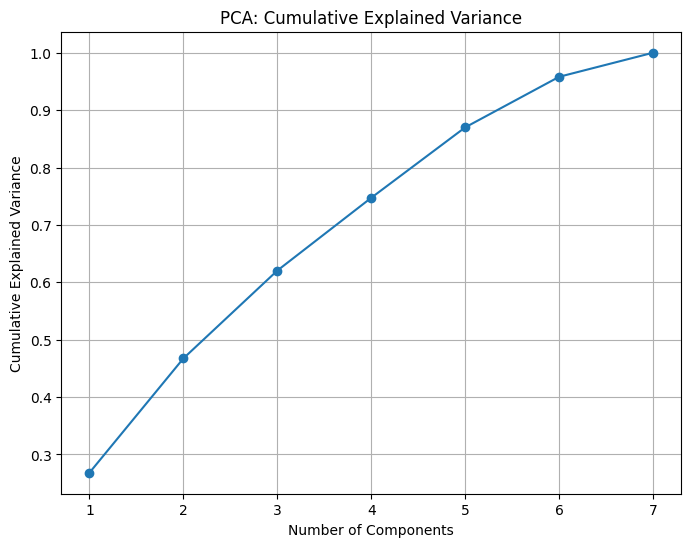

Optimal number of components: 5


In [51]:
X_std = scale_data(X)
X_pca, d = perform_pca(X_std)

In [52]:
def apply_tsne(df, learning_rate=500, perplexity=30, random_state=None):
    """Apply t-SNE on the data."""
    tsne = TSNE(n_components=2, learning_rate=learning_rate, perplexity=perplexity, random_state=random_state)
    return tsne.fit_transform(df)

def apply_kmeans(df, n_clusters, random_state=None):
    """Apply KMeans clustering on the data."""
    clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
    clusterer.fit(df)
    return clusterer.labels_

def calculate_silhouette_score(X, labels):
    """Calculate the silhouette score."""
    return silhouette_score(X, labels)

def tsne_kmeans_pipeline(df, n_clusters, learning_rate=500, perplexity=30, random_state=None):
    """A pipeline to apply t-SNE followed by KMeans clustering."""

    # extract feature columns
    X = df[['danceability', 'energy', 'liveness', 'valence', 'acousticness', 'speechiness', 'instrumentalness']]

    # scale data
    X_scaled = scale_data(X)

    # perform t-SNE
    X_tsne = apply_tsne(X_scaled, learning_rate=learning_rate, perplexity=perplexity, random_state=random_state)

    # perform K-Means
    labels = apply_kmeans(X_tsne, n_clusters, random_state=random_state)

    # add the cluster labels to your original dataframe
    df['cluster'] = labels + 1

    # calculate silhouette score
    silhouette_avg = calculate_silhouette_score(X_tsne, labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}")

    # plot clusters
    fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=df['cluster'])
    fig.update_layout(title=f"t-SNE with K-Means Clustering (n_clusters={n_clusters})", 
                      xaxis_title="Component 1", yaxis_title="Component 2")
    fig.show()


In [53]:
tsne_kmeans = tsne_kmeans_pipeline(US_2022_audio, n_clusters=5, learning_rate=500, perplexity=30, random_state=42)
tsne_kmeans

For n_clusters = 5, The average silhouette_score is : 0.3838140666484833


In [54]:
def cluster_mean_data(df):
    """
    Calculate the means of certain columns for each cluster in a DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame to analyze. This DataFrame should include a 'cluster' column.

    Returns:
        pd.DataFrame: A DataFrame with the mean of each specified column per cluster.
    """
    # select columns to include in the analysis
    cols = ['cluster', 'danceability', 'energy', 'liveness', 'valence', 'acousticness', 
            'speechiness', 'instrumentalness']

    # ensure that the 'cluster' column is of type int
    # This is needed for the groupby operation
    df['cluster'] = df['cluster'].astype(int)
    
    # calculate means for each cluster and reset index
    # transform the index (formed by the unique clusters) into a column
    cluster_means = df[cols].groupby('cluster').mean().reset_index()

    return cluster_means

In [55]:
df_means = cluster_mean_data(US_2022_audio)
df_means

,cluster,danceability,energy,liveness,valence,acousticness,speechiness,instrumentalness
0,1,0.583436,0.444626,0.136430,0.346657,0.469834,0.058278,0.009776
1,2,0.655789,0.739251,0.400220,0.625994,0.136020,0.145114,0.010734
2,3,0.533067,0.786154,0.183723,0.446939,0.058768,0.067715,0.014063
3,4,0.528089,0.622668,0.168967,0.358306,0.215930,0.057363,0.508581
4,5,0.727674,0.634158,0.125439,0.583748,0.241623,0.230759,0.006839


In [56]:
# specify features for training and prediction
train_features = ['danceability', 'energy', 'liveness', 'valence', 'acousticness', 'speechiness', 'instrumentalness']

def train_and_predict_genre(df, genre_df, model):
    """
    Train a machine learning model to predict the genre of a song based on audio features,
    and use this model to predict the genre of each cluster in a DataFrame.

    Args:
        df (pd.DataFrame): DataFrame with cluster data.
        genre_df (pd.DataFrame): DataFrame with genre data.
        model (sklearn.base.BaseEstimator): The machine learning model to train.

    Returns:
        pd.DataFrame: The original DataFrame with an additional column for predicted genres.
    """
    # split the genre data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        genre_df[train_features], 
        genre_df['genre'], 
        test_size=0.3, 
        random_state=42
    )

    # create a pipeline that scales the data and fits the model
    pipeline = make_pipeline(StandardScaler(), model)
    
    # train the model on the training data
    pipeline.fit(X_train, y_train)

    # use the trained model to predict genres for the test data
    y_pred_test = pipeline.predict(X_test)
    
    # print a classification report for the test predictions
    print(f"Classification report for {model.__class__.__name__}:\n")
    print(classification_report(y_test, y_pred_test))
    
    
    # use the trained model to predict genres for the cluster data
    cluster_genres = pipeline.predict(df[train_features])
    
    # add the predicted genres to the original DataFrame
    df['predicted_genre'] = cluster_genres
    
    return df

In [57]:
# define models with optimal parameters
optimal_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
optimal_svc = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)


In [58]:
train_and_predict_genre(df_means, train, optimal_rf)

Classification report for RandomForestClassifier:

                 precision    recall  f1-score   support

      Dark Trap       0.43      0.35      0.38      1421
            Emo       0.61      0.62      0.62       516
         Hiphop       0.30      0.09      0.13       911
            Pop       0.12      0.01      0.01       146
            Rap       0.00      0.00      0.00       529
            RnB       0.35      0.27      0.31       596
     Trap Metal       0.36      0.07      0.12       577
Underground Rap       0.37      0.76      0.50      1782
            dnb       0.45      0.31      0.37       908
      hardstyle       0.49      0.63      0.55       885
      psytrance       0.65      0.67      0.66       904
      techhouse       0.73      0.79      0.76       866
         techno       0.67      0.73      0.70       894
         trance       0.46      0.48      0.47       876
           trap       0.55      0.60      0.57       881

       accuracy                    

,cluster,danceability,energy,liveness,valence,acousticness,speechiness,instrumentalness,predicted_genre
0,1,0.583436,0.444626,0.136430,0.346657,0.469834,0.058278,0.009776,Dark Trap
1,2,0.655789,0.739251,0.400220,0.625994,0.136020,0.145114,0.010734,Underground Rap
2,3,0.533067,0.786154,0.183723,0.446939,0.058768,0.067715,0.014063,hardstyle
3,4,0.528089,0.622668,0.168967,0.358306,0.215930,0.057363,0.508581,Dark Trap
4,5,0.727674,0.634158,0.125439,0.583748,0.241623,0.230759,0.006839,Underground Rap


In [59]:
train_and_predict_genre(df_means, train, optimal_svc)

Classification report for SVC:

                 precision    recall  f1-score   support

      Dark Trap       0.44      0.32      0.37      1421
            Emo       0.53      0.58      0.55       516
         Hiphop       0.34      0.06      0.11       911
            Pop       0.00      0.00      0.00       146
            Rap       0.00      0.00      0.00       529
            RnB       0.35      0.26      0.30       596
     Trap Metal       0.37      0.04      0.07       577
Underground Rap       0.37      0.82      0.51      1782
            dnb       0.40      0.26      0.32       908
      hardstyle       0.43      0.56      0.49       885
      psytrance       0.58      0.66      0.62       904
      techhouse       0.70      0.72      0.71       866
         techno       0.65      0.69      0.67       894
         trance       0.45      0.46      0.45       876
           trap       0.50      0.52      0.51       881

       accuracy                           0.46     126

,cluster,danceability,energy,liveness,valence,acousticness,speechiness,instrumentalness,predicted_genre
0,1,0.583436,0.444626,0.136430,0.346657,0.469834,0.058278,0.009776,RnB
1,2,0.655789,0.739251,0.400220,0.625994,0.136020,0.145114,0.010734,Underground Rap
2,3,0.533067,0.786154,0.183723,0.446939,0.058768,0.067715,0.014063,Emo
3,4,0.528089,0.622668,0.168967,0.358306,0.215930,0.057363,0.508581,Dark Trap
4,5,0.727674,0.634158,0.125439,0.583748,0.241623,0.230759,0.006839,Underground Rap


#### 3.2.2 Results of Cluster Analysis

**Clustering Analysis**

The application of unsupervised learning techniques, specifically K-Means clustering and T-SNE, was used to identify distinct genre-based musical clusters within the tweeted Spotify tracks. The classification reports for both the Support Vector Classifier (SVC) and RandomForestClassifier were generated to evaluate the performance of the models.

For the SVC, the overall accuracy was 46%, with the highest f1-score observed for the 'Underground Rap' genre (0.51). The precision, recall, and f1-score for each genre varied, indicating the complexity and diversity of the dataset. The RandomForestClassifier, on the other hand, achieved an overall accuracy of 49%, with the highest f1-score observed for the 'techhouse' genre (0.76). 

The clusters generated through K-Means clustering were analyzed based on their mean audio features. Each cluster was assigned a predicted genre based on the dominant genre within that cluster. For instance, Cluster 1, characterized by a mean danceability of 0.583436 and energy of 0.444626, was predominantly associated with the 'Dark Trap' genre in both SVC and RandomForestClassifier. Similarly, Cluster 2, with a mean danceability of 0.655789 and energy of 0.739251, was associated with the 'Underground Rap' genre. 

These findings suggest that unsupervised learning techniques can effectively identify distinct genre-based musical clusters within the tweeted Spotify tracks. However, the variation in precision, recall, and f1-score across different genres indicates the need for further optimization and refinement of the models. The identified clusters and their associated genres provide valuable insights into the diversity and specificity of music preferences among Twitter users.

### 3.3 Comparative Analysis

#### 3.3.1 Descriptive Statistics: Twitter vs Billboard

In [60]:
def mean_audio_features(df, cols=None):
    """
    Compute mean audio features for a given DataFrame.
    
    Parameters:
    df (pandas.DataFrame): Dataframe containing audio feature columns.
    cols (list): List of audio feature columns to include. If None, all columns are included.
    
    Returns:
    pandas.Series: Mean audio features.
    """
    # If no columns are specified, use all columns
    if cols is None:
        cols = df.columns

    # Subset dataframe
    df = df[cols]

    # Normalize to 0-1 range and take mean values
    df_mean = ((df - df.min()) / (df.max() - df.min())).mean()

    # Convert to 0-100 scale for readability
    df_mean = (df_mean * 100).round(2)

    return df_mean

In [61]:
def descriptive_statistics(df1, df2, features):
    stats1 = df1[features].describe()
    stats2 = df2[features].describe()
    return pd.concat([stats1, stats2], keys=['Twitter', 'Billboard'])


In [62]:
features = ['danceability', 'energy', 'liveness', 'valence', 'acousticness', 'speechiness', 'instrumentalness']
df1 = mean_audio_features(US_2022_audio, features)
df2 = mean_audio_features(billboard_2022, features)

In [63]:
descriptive_statistics(US_2022_audio, billboard_2022, features)

danceability        energy      liveness       valence  \
Twitter   count  11211.000000  11211.000000  11211.000000  11211.000000   
          mean       0.611411      0.635503      0.193378      0.472584   
          std        0.168487      0.202709      0.157934      0.240279   
          min        0.062100      0.002250      0.009860      0.027400   
          25%        0.498000      0.503000      0.097600      0.278000   
          50%        0.625000      0.650000      0.128000      0.462000   
          75%        0.737000      0.790000      0.244000      0.662000   
          max        0.986000      0.999000      0.993000      0.994000   
Billboard count    100.000000    100.000000    100.000000    100.000000   
          mean       0.671230      0.647520      0.171624      0.544630   
          std        0.135593      0.153903      0.125827      0.233360   
          min        0.336000      0.192000      0.026400      0.106000   
          25%        0.582000      0.531500      0.092100      0.386500   
          50%        0.672000      0.662000      0.117000      0.539000   
          75%        0.775250      0.764000      0.226250      0.725500   
          max        0.950000      0.931000      0.605000      0.956000   

                 acousticness   speechiness  instrumentalness  
Twitter   count  11211.000000  11211.000000      11211.000000  
          mean       0.238179      0.115372          0.078803  
          std        0.273132      0.116580          0.217409  
          min        0.000001      0.022700          0.000000  
          25%        0.019900      0.038200          0.000000  
          50%        0.122000      0.061300          0.000015  
          75%        0.380000      0.149000          0.003740  
          max        0.995000      0.950000          0.982000  
Billboard count    100.000000    100.000000        100.000000  
          mean       0.219960      0.092443          0.000284  
          std        0.218444      0.088332          0.001161  
          min        0.000307      0.026800          0.000000  
          25%        0.037750      0.035700          0.000000  
          50%        0.132500      0.053050          0.000000  
          75%        0.336750      0.098050          0.000017  
          max        0.891000      0.399000          0.008230

#### 3.3.2 Assumption Checks

##### Homoscedasticity Tests (Levene's Test)

In [64]:
def check_homoscedasticity(data1, data2):
    # Perform Levene's test for homoscedasticity
    statistic, p_value = levene(data1, data2)
    print(f"Levene's Test: statistic = {statistic}, p_value = {p_value}")

#### 3.3.3 Non-parametric Tests for Non-Normal Data

##### Mann-Whitney U Test

In [65]:
def perform_mannwhitneyu_test(df1, df2, features, alpha=0.05):
    """
    Function to perform Mann-Whitney U test for a list of features between two dataframes,
    and perform Bonferroni correction for multiple comparisons.
    Returns a dataframe with p-values for each feature and whether the test is significant at the alpha level.
    """
    p_values = {}
    significances = {}
    bonferroni_alpha = alpha / len(features)
    
    for feature in features:
        stat, p = mannwhitneyu(df1[feature], df2[feature])
        p_values[feature] = p
        significances[feature] = 'Yes' if p < bonferroni_alpha else 'No'
    
    df = pd.DataFrame([p_values, significances], index=['p-value', 'Significant at alpha']).transpose()
    df['p-value'] = df['p-value'].astype(float)
    
    return df

# Usage:
perform_mannwhitneyu_test(US_2022_audio, billboard_2022, features)



,p-value,Significant at alpha
danceability,7.157141e-04,Yes
energy,7.759388e-01,No
liveness,1.586754e-01,No
valence,3.133395e-03,Yes
acousticness,4.605519e-01,No
speechiness,7.270159e-02,No
instrumentalness,1.908836e-08,Yes


#### 3.3.4 Correlation Analysis (Spearman Rank Correlation)

In [66]:
def compute_correlation_df(df, features):
    """
    Function to compute the correlation DataFrame for the given features in the DataFrame.
    """
    correlation_df = df[features].corr(method='spearman')
    
    return correlation_df

compute_correlation_df(US_2022_audio, features)

,danceability,energy,liveness,valence,acousticness,speechiness,instrumentalness
danceability,1.000000,-0.065058,-0.127569,0.368858,-0.009298,0.276060,-0.149650
energy,-0.065058,1.000000,0.173169,0.257413,-0.567751,0.182201,0.024293
liveness,-0.127569,0.173169,1.000000,-0.008242,-0.088547,0.085953,-0.047876
valence,0.368858,0.257413,-0.008242,1.000000,-0.011452,0.093139,-0.133162
acousticness,-0.009298,-0.567751,-0.088547,-0.011452,1.000000,-0.092324,-0.093890
speechiness,0.276060,0.182201,0.085953,0.093139,-0.092324,1.000000,-0.280739
instrumentalness,-0.149650,0.024293,-0.047876,-0.133162,-0.093890,-0.280739,1.000000


In [67]:
compute_correlation_df(billboard_2022, features)

,danceability,energy,liveness,valence,acousticness,speechiness,instrumentalness
danceability,1.000000,0.063154,0.072110,0.239097,-0.203721,0.325501,0.216900
energy,0.063154,1.000000,0.161324,0.441424,-0.459271,0.009580,-0.046121
liveness,0.072110,0.161324,1.000000,0.115958,0.042983,-0.004195,-0.032289
valence,0.239097,0.441424,0.115958,1.000000,-0.071223,-0.040647,-0.099555
acousticness,-0.203721,-0.459271,0.042983,-0.071223,1.000000,-0.086822,-0.108481
speechiness,0.325501,0.009580,-0.004195,-0.040647,-0.086822,1.000000,-0.080357
instrumentalness,0.216900,-0.046121,-0.032289,-0.099555,-0.108481,-0.080357,1.000000


#### 3.3.5 Effect Size Calculation

In [68]:
def calculate_cohens_d(group1, group2):
    # calculate the size of samples
    n1, n2 = len(group1), len(group2)
    # calculate the variance of the samples
    s1, s2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    # calculate the pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = np.mean(group1), np.mean(group2)
    # calculate the effect size
    return (u1 - u2) / s

In [69]:
def calculate_effect_sizes(df1, df2, features):
    effect_sizes = {feature: calculate_cohens_d(df1[feature], df2[feature]) for feature in features}
    return pd.Series(effect_sizes, name='Cohen\'s d')

In [70]:
calculate_effect_sizes(US_2022_audio, billboard_2022, features)

danceability       -0.355584
energy             -0.059393
liveness            0.137960
valence            -0.299916
acousticness        0.066808
speechiness         0.197049
instrumentalness    0.362748
Name: Cohen's d, dtype: float64

#### 3.3.6 Interpretation of Statistical Tests

#### 3.3.7 Twitter vs Billboard: Genre Trends

In [71]:
genre_count(US_2022_genres)

In [72]:
genre_count(billboard_2022_genres)

#### 3.3.8 Key Observations

##### Descriptive Statistics
- **Twitter:** Mean values indicate a preference for tracks with moderate danceability (0.611), energy (0.636), and valence (0.473), with a notable skew towards non-instrumental tracks (mean instrumentalness: 0.079).
- **Billboard:** Conversely, tracks tend to showcase slightly higher danceability (0.671) and valence (0.545), with an even lower inclination towards instrumentalness (mean: 0.000284).

##### Significance Testing
- **Mann-Whitney U Test:** Pointed towards significant differences in danceability (p < 0.001), valence (p = 0.003), and instrumentalness (p < 0.001) between the two platforms, indicating disparities in listener preference or artist selection in these attributes.

##### Correlation Analysis 
- **Spearman Rank Correlation:** Coefficients revealed subtle differences in the relationships between musical attributes across the two platforms. For instance, energy and acousticness displayed a notably strong negative correlation on Twitter (-0.568) compared to Billboard (-0.459).

##### Genre Distribution 
- Distinct preferences in genre distribution were noted, with "rap" and "pop" consistently featuring in the top genres across both platforms, albeit with different rankings.

##### Implications:
1. **Divergent Listening Behaviors:**
  - Discrepancies in musical attributes (e.g., danceability, valence) between Twitter and Billboard highlight variances in listening and sharing behaviors across platforms.
  - Billboard's elevated danceability and valence may signal a mainstream preference for upbeat, positive tracks, contrasting with the broader array of tracks shared on Twitter.

2. **Musical Composition Insights:**
  - Correlation differences in musical attributes, such as energy and acousticness, between platforms hint at distinct compositional trends.

3. **Genre Popularity Disparities:**
  - Despite "rap" and "pop" being popular across both platforms, variations in rankings and subsequent genres indicate differentiated genre popularity and representation.
  - Twitter’s genre distribution might mirror individualized user preferences, while Billboard could reflect more generalized or mainstream tastes.


---

## 4. Playlist Curation

The playlist curation seeks to leverage the insights derived from the exploratory data analysis and cluster analysis to curate Spotify playlists that resonate with different musical attributes and listener preferences observed across various clusters. The methodology for playlist curation encompasses:

### 1. Recommendation Generation

- **Utilize Spotify’s Recommendation Endpoint:**
  - Leverage Spotify API's recommendation generation capabilities based on seed genres and target audio features derived from cluster characteristics.
- **Define Cluster Features:**
  - Utilize mean values of musical attributes (e.g., danceability, energy, etc.) obtained from clusters identified during the cluster analysis.
- **Seed Genres Determination:**
  - Specify seed genres relevant to each cluster to guide the recommendation engine towards generating genre-specific recommendations.

### 2. Recommendation Processing

- **Retrieve Recommendations:**
  - Employ a function to request track recommendations from Spotify based on predefined cluster features and seed genres.
- **Filter and Validate Recommendations:**
  - Ensure recommendations adhere to predefined criteria regarding artist followers and release date.
- **Compute Distance to Cluster:**
  - Calculate the Euclidean distance between recommended tracks and respective cluster centroids to ensure musical alignment with cluster characteristics.
- **Sort and Select Tracks:**
  - Prioritize tracks based on proximity to the cluster centroid and validate against additional criteria, ensuring recommendations are both relevant and varied.

### 3. Dataframe Creation for Recommendations

- **Compile Track Information:**
  - Extract pertinent information for each recommended track including name, artist, release date, and audio features.
- **Construct Dataframe:**
  - Populate a dataframe with the extracted track information, providing a structured format for further analysis and validation.

### 4. Playlist Creation on Spotify

- **Initiate Playlist Creation:**
  - Define user ID, authorization token, playlist name, description, and visibility status.
- **API Integration for Playlist Creation:**
  - Utilize Spotify’s API to initiate playlist creation on the user’s Spotify account, ensuring adherence to API request formats and authorization protocols.
- **Track Addition to Playlist:**
  - Populate the created playlist with the finalized set of recommended tracks, ensuring API requests adhere to data format and authorization requirements.
- **Validation and Confirmation:**
  - Confirm successful playlist creation and track addition via API response validation, ensuring error handling for unsuccessful attempts.


In [73]:
# function to get recommendations based on seed genres and target audio features
def get_recommendations(cluster_features, num_songs, seed_genres=None):
    target_values = {f'target_{feature}': value for feature, value in cluster_features.items()}
    return sp.recommendations(seed_genres=seed_genres, limit=num_songs*5, **target_values)

# function to get track info
def get_track_info(track):
    name = track['name']
    artist = track['artists'][0]['name']
    track_id = track['id']
    release_date = track['album']['release_date']
    audio_features = sp.audio_features(track_id)[0]
    return name, artist, track_id, release_date, audio_features

# function to create dataframe
def create_dataframe(tracks):
    data = [get_track_info(track) for track in tracks]
    return pd.DataFrame(data, columns=['name', 'artist', 'id', 'release_date', 'audio_features'])

# function to compute distance to cluster
def compute_distance_to_cluster(audio_features, cluster_features):
    differences = [audio_features[feat] - cluster_features[feat] for feat in features]
    return np.linalg.norm(differences)

# function to compute distances to cluster
def compute_distances_to_cluster(df, cluster_features):
    df['distance_to_cluster'] = df['audio_features'].apply(lambda x: compute_distance_to_cluster(x, cluster_features))
    return df.sort_values('distance_to_cluster')

# function to check artist criteria
def check_artist_criteria(track_id, min_followers, max_followers, min_year, max_year):
    track_info = sp.track(track_id)
    artist_id = track_info['artists'][0]['id']
    release_date = int(track_info['album']['release_date'][:4])
    artist_info = sp.artist(artist_id)
    return (min_followers <= artist_info['followers']['total'] <= max_followers and 
            min_year <= release_date <= max_year)

# function to filter tracks
def filter_tracks(df, min_followers, max_followers, min_year, max_year, num_songs):
    df = df[df['id'].apply(lambda x: check_artist_criteria(x, min_followers, max_followers, min_year, max_year))]
    return df.head(num_songs)

# main function to get Spotify recommendations
def recommendation_spotify(cluster_features, num_songs, seed_genres=None, min_followers=50000, max_followers=5000000, min_year=2012, max_year=2022):
    recommendations = get_recommendations(cluster_features, num_songs, seed_genres)
    recs_df = create_dataframe(recommendations['tracks'])
    recs_df = compute_distances_to_cluster(recs_df, cluster_features)
    return filter_tracks(recs_df, min_followers, max_followers, min_year, max_year, num_songs)[['name', 'artist', 'id']]


In [ ]:
"""
USE CASE:

# specify the features of the cluster for which you want recommendations
cluster_features = {
    'danceability': 0.7,
    'energy': 0.6,
    'speechiness': 0.1,
    'acousticness': 0.2,
    'instrumentalness': 0.1,
    'liveness': 0.2,
    'valence': 0.5
}

# specify other parameters
num_songs = 10
seed_genres = ['pop', 'rock']

# call the function
recommendations = recommendation_spotify(cluster_features, num_songs, seed_genres)
print(recommendations)


"""

In [75]:
# features for each cluster
cluster_features = [
    {'danceability': 0.583436, 'energy': 0.444626, 'speechiness': 0.136430, 'acousticness': 0.346657, 'instrumentalness': 0.469834, 'liveness': 0.058278, 'valence': 0.009776},
    {'danceability': 0.655789, 'energy': 0.739251, 'speechiness': 0.400220, 'acousticness': 0.625994, 'instrumentalness': 0.136020, 'liveness': 0.145114, 'valence': 0.010734},
    {'danceability': 0.533067, 'energy': 0.786154, 'speechiness': 0.183723, 'acousticness': 0.446939, 'instrumentalness': 0.058768, 'liveness': 0.067715, 'valence': 0.014063},
    {'danceability': 0.528089, 'energy': 0.622668, 'speechiness': 0.168967, 'acousticness': 0.358306, 'instrumentalness': 0.215930, 'liveness': 0.057363, 'valence': 0.508581},
    {'danceability': 0.727674, 'energy': 0.634158, 'speechiness': 0.125439, 'acousticness': 0.583748, 'instrumentalness': 0.241623, 'liveness': 0.230759, 'valence': 0.006839}
]

# corresponding genres for each cluster
seed_genres_list = [
    ['hip-hop', 'r-n-b'], # cluster 1
    ['hip-hop'], # cluster 2 
    ['hardstyle', 'emo'], # cluster 3
    ['hip-hop'], # cluster 4
    ['hip-hop'] # cluster 5
]

num_songs = 20  # num of songs to recommend per cluster

# elements in ea list will contain the recommendations for the corresponding cluster
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []

clusters = [cluster1, cluster2, cluster3, cluster4, cluster5]

for i in range(5):  # iterating through each cluster
    recommendations = recommendation_spotify(cluster_features[i], num_songs, seed_genres_list[i])
    clusters[i].append(recommendations)
    print(f"Recommendations for cluster {i+1}:")
    print(recommendations)
    print("\n")

Recommendations for cluster 1:
                                         name                   artist  \
2                                       Weary                  Solange   
7                                   Nightmare                   Offset   
4                              HEARD ABOUT US              The Carters   
0                                         Why                Roy Woods   
17                                      Vault             Keyshia Cole   
19                                  King City             Majid Jordan   
13                      Someone to Drink With                     Russ   
28                                    When We                     Tank   
21                    Show Me (feat. Jeremih)                  Omarion   
30                             Indestructible            Mary J. Blige   
56                                  Frontline                   Kelela   
51                                     Afraid              Xavier Omär   
39     

In [76]:
def create_playlist(user_id, token, playlist_name, description, public, song_ids):  # add song_ids parameter here
    endpoint_url = f"https://api.spotify.com/v1/users/{user_id}/playlists"

    # request body for creating the playlist
    request_body = json.dumps({
        "name": playlist_name,
        "description": description,
        "public": public
    })

    # create the playlist
    response = requests.post(
        url = endpoint_url, 
        data = request_body, 
        headers = {
            "Content-Type":"application/json", 
            "Authorization": f"Bearer {token}"
        }
    )

    # check if the playlist was successfully created
    if response.status_code == 201:
        print(f'Playlist {playlist_name} created successfully')
        
        # extract the playlist ID
        playlist_id = response.json()['id']
        
        # add tracks to the playlist
        endpoint_url += f'/{playlist_id}/tracks'
        request_body = json.dumps({'uris': [f'spotify:track:{id}' for id in song_ids]})
        response = requests.post(
            url = endpoint_url,
            data = request_body,
            headers = {
                "Content-Type":"application/json",
                "Authorization": f"Bearer {token}"
            }
        )
        
        if response.status_code == 201:
            print('Songs added to the playlist successfully')
        else:
            print('Could not add songs to the playlist')
    else:
        print('Could not create the playlist')
        print(f'Status Code: {response.status_code}')
        print(f'Response: {response.json()}')
        


In [ ]:
"""
USE CASE:

get token via: https://alecchen.dev/spotify-refresh-token/

song_ids = clusters['id'].tolist()
user_id = "@tweetify"
cluster_playlist = "Playlist"
cluster_desc = "Tweetify"
public = False
my_token = 'TOKEN GOES HERE'

create_playlist(user_id, my_token, cluster_playlist, cluster_desc, public, song_ids)

"""

---

## 5. Conclusion and Recommendations

### 5.1 Interpretation of Findings

#### Sentiment Analysis
- **Emotional Variety in Lyrical Content:**
  - Observations indicate a mix of positive and negative emotional expressions in lyrics, with words like "love" highlighting positivity and "leave" or "die" potentially pointing towards themes of loss or struggle.
  - The presence of both positive and negative words suggests a wide range of lyrical themes being explored in popular music.

#### Audio Feature Analysis
- **Listener Preferences in Musical Characteristics:**
  - Listener preferences appear to favor tracks with moderate levels of energy and danceability, alongside a lower prevalence of instrumental tracks, as indicated by low instrumentalness.
  - Acoustic elements are notably present, with a higher acousticness value indicating potential listener interest in acoustic and semi-acoustic arrangements.
  - The data suggests a preference for more contemporary music, with a mean year of 2012, and a concentration of tracks from the recent decade.
  - Key distribution is relatively even, indicating no substantial bias towards a particular musical key.

#### Cluster Analysis
- **Clustering Reveals Diverse Musical Characteristics:**
  - The clusters represent groups of songs with shared audio characteristics, potentially mapping onto different moods or sub-genres.
  - Each cluster is characterized by distinct patterns in audio features, suggesting they may appeal to different listener demographics or contexts.
  - The characteristics of each cluster suggest potential associations with particular genres or moods, though further analysis may be required to validate these associations.

#### Comparative Analysis (Billboard vs. Twitter)
- **Differences in Listener Preferences Across Platforms:**
  - Discrepancies in mean values for musical attributes like danceability and valence between Twitter and Billboard indicate different listener preferences or artist selection criteria across these platforms.
  - Billboard tracks exhibit slightly higher danceability and valence, possibly reflecting a commercial or mainstream preference for more upbeat and positive music.
- **Significant Musical Attribute Disparities:**
  - Statistical tests show significant differences in several musical attributes between the two platforms, underscoring the divergence in musical landscapes between user-shared and commercially popular tracks.
- **Genre Popularity and Distribution Discrepancy:**
  - While certain genres (e.g., rap, pop) are popular across both platforms, differences in rankings and subsequent genres suggest varied genre representation and popularity between user-sharing and commercial platforms.


### 5.2 Implications and Contributions of the Study

This study contributes to the field of music information retrieval and natural language processing by offering a comprehensive analysis of music preferences and trends derived from Twitter data. The insights gleaned from this analysis have far-reaching implications for the music industry, enabling stakeholders to tailor their strategies to align with contemporary music consumption trends.

The exploration of correlations between audio features and the application of unsupervised learning techniques in genre analysis contribute to the academic discourse in musicology and computer science, providing a methodological framework for future research in music preference analysis.

### 5.3 Limitations and Challenges

While the study provides valuable insights, it is not without limitations. The reliance on Twitter data may introduce biases, as the user demographics and music sharing behaviors on Twitter may not be representative of the broader population. The variations in precision, recall, and f1-score across different genres in clustering analysis indicate the complexity and diversity of the dataset, necessitating further refinement and optimization of the models.

The study is also constrained by the inherent limitations of the applied machine learning techniques and the availability and quality of the data, which may impact the generalizability and robustness of the findings.

### 5.4 Recommendations for Future Research

Given the limitations and the insights obtained from this study, future research should focus on expanding the scope of data sources to include other social media platforms and music streaming services to attain a more holistic understanding of music preferences and trends. There is a need to explore advanced machine learning and natural language processing techniques to enhance the accuracy and reliability of music preference analysis.

In conclusion, this study serves as a stepping stone for future research in the intersection of social media and music streaming platforms, offering a methodological and analytical framework for exploring the multifaceted dimensions of music preferences and consumption trends.